In [1]:
!pip install pandas
!pip install requests
!pip install bs4
!pip install html5lib 
!pip install lxml
!pip install plotly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 107.4 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 94.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 346.6/346.6 kB 24.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 85.6 MB/s eta 0:00:00:00:01


In [2]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [3]:
!pip install yfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 948.2/948.2 kB 41.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.7/104.7 kB 12.4 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.17.8-cp311-cp311-linux_x86_64.whl size=300749 sha256=5e19305e86177007b5dadd69e05bd9ea1dd19f47564d17e780a1ff3fe18dcac3
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/ff/6c/15/506e25bc390de450a7fa53c155cd9b0fbd13ad3e84a9abc183
Successfully built peewee


In [4]:
import yfinance as yf
tesla = yf.Ticker("TSLA")
tsla_data = tesla.history(period="1y")
tsla_data.head()


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-01-04 00:00:00-05:00,239.250000,242.699997,237.729996,237.929993,102629300,0.0,0.0
2024-01-05 00:00:00-05:00,236.860001,240.119995,234.899994,237.490005,92379400,0.0,0.0
2024-01-08 00:00:00-05:00,236.139999,241.250000,235.300003,240.449997,85166600,0.0,0.0
2024-01-09 00:00:00-05:00,238.110001,238.960007,232.039993,234.960007,96705700,0.0,0.0
2024-01-10 00:00:00-05:00,235.100006,235.500000,231.289993,233.940002,91628500,0.0,0.0


In [10]:
import requests
from bs4 import BeautifulSoup

url = "https://es.finance.yahoo.com/quote/TSLA/financials/"
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')
# Extrae los datos específicos


In [11]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL de MacroTrends con los datos de ingresos de Tesla
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"

# Realizar la solicitud HTTP a la página
headers = {'User-Agent': 'Mozilla/5.0'}
response = requests.get(url, headers=headers)

# Verificar que la solicitud fue exitosa
if response.status_code == 200:
    # Analizar el contenido HTML de la página
    soup = BeautifulSoup(response.content, 'html.parser')
    
    # Encontrar la tabla que contiene los datos de ingresos
    table = soup.find('table', {'class': 'historical_data_table'})
    
    # Extraer las filas de la tabla
    rows = table.find_all('tr')
    
    # Crear listas para almacenar las fechas y los ingresos
    dates = []
    revenues = []
    
    # Iterar sobre las filas y extraer los datos
    for row in rows[1:]:  # Omitir la primera fila que contiene los encabezados
        cols = row.find_all('td')
        if len(cols) == 2:
            date = cols[0].get_text(strip=True)
            revenue = cols[1].get_text(strip=True).replace('$', '').replace(',', '')
            dates.append(date)
            revenues.append(float(revenue))
    
    # Crear un DataFrame con los datos extraídos
    data = pd.DataFrame({'Date': dates, 'Revenue (in millions USD)': revenues})
    
    # Mostrar los primeros registros del DataFrame
    print(data.head())
else:
    print(f"Error al acceder a la página: {response.status_code}")


   Date  Revenue (in millions USD)
0  2023                    96773.0
1  2022                    81462.0
2  2021                    53823.0
3  2020                    31536.0
4  2019                    24578.0


In [12]:
gamestop = yf.Ticker("GME")
gme_data = gamestop.history(period="1y")
gme_data.head()


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-01-04 00:00:00-05:00,16.51,16.750000,16.309999,16.360001,2671500,0.0,0.0
2024-01-05 00:00:00-05:00,16.16,16.520000,15.960000,15.960000,2615700,0.0,0.0
2024-01-08 00:00:00-05:00,15.78,16.120001,15.700000,15.790000,3031100,0.0,0.0
2024-01-09 00:00:00-05:00,15.59,15.620000,15.120000,15.160000,3105300,0.0,0.0
2024-01-10 00:00:00-05:00,15.12,15.760000,14.970000,15.730000,3191700,0.0,0.0


In [13]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL de MacroTrends para los datos de ingresos de GameStop
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"

# Realizar la solicitud HTTP a la página
headers = {'User-Agent': 'Mozilla/5.0'}
response = requests.get(url, headers=headers)

# Verificar que la solicitud fue exitosa
if response.status_code == 200:
    # Analizar el contenido HTML de la página
    soup = BeautifulSoup(response.content, 'html.parser')
    
    # Encontrar la tabla que contiene los datos de ingresos
    table = soup.find('table', {'class': 'historical_data_table'})
    
    # Extraer las filas de la tabla
    rows = table.find_all('tr')
    
    # Crear listas para almacenar las fechas y los ingresos
    dates = []
    revenues = []
    
    # Iterar sobre las filas y extraer los datos
    for row in rows[1:]:  # Omitir la primera fila que contiene los encabezados
        cols = row.find_all('td')
        if len(cols) == 2:
            date = cols[0].get_text(strip=True)
            revenue = cols[1].get_text(strip=True).replace('$', '').replace(',', '')
            dates.append(date)
            try:
                revenues.append(float(revenue))  # Convertir a float para análisis posterior
            except ValueError:
                revenues.append(None)  # Manejar valores faltantes o "N/A"
    
    # Crear un DataFrame con los datos extraídos
    data = pd.DataFrame({'Date': dates, 'Revenue (in millions USD)': revenues})
    
    # Mostrar los primeros registros del DataFrame
    print(data.head())
else:
    print(f"Error al acceder a la página: {response.status_code}")


   Date  Revenue (in millions USD)
0  2024                     5273.0
1  2023                     5927.0
2  2022                     6011.0
3  2021                     5090.0
4  2020                     6466.0


In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(tsla_data.index, tsla_data['Close'], label='Precio de Cierre')
plt.title('Tesla: Precio de Acciones vs Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Precio ($)')
plt.legend()
plt.show()


ModuleNotFoundError: No module named 'matplotlib'

In [15]:
!pip install matplotlib


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.1/165.1 kB 20.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 116.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 326.2/326.2 kB 33.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 124.0 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 90.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 95.8 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.7/107.7 kB 13.6 MB/s eta 0:00:00


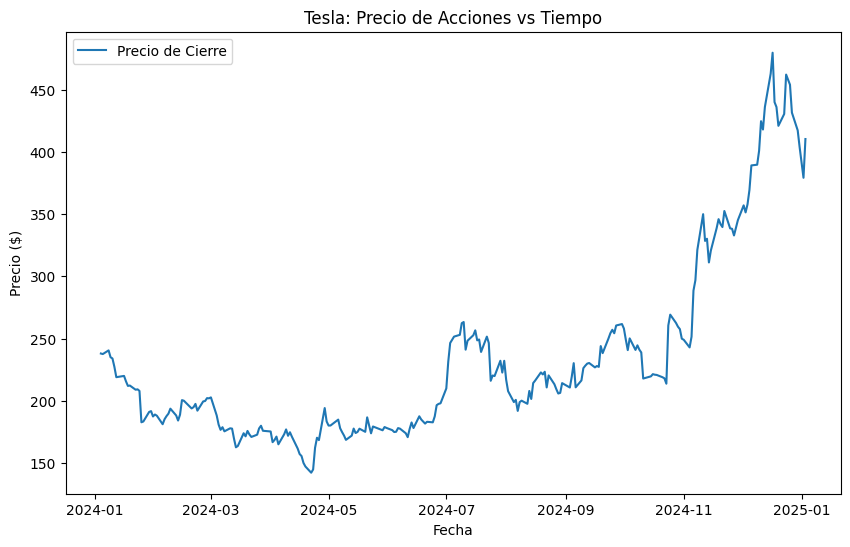

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(tsla_data.index, tsla_data['Close'], label='Precio de Cierre')
plt.title('Tesla: Precio de Acciones vs Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Precio ($)')
plt.legend()
plt.show()


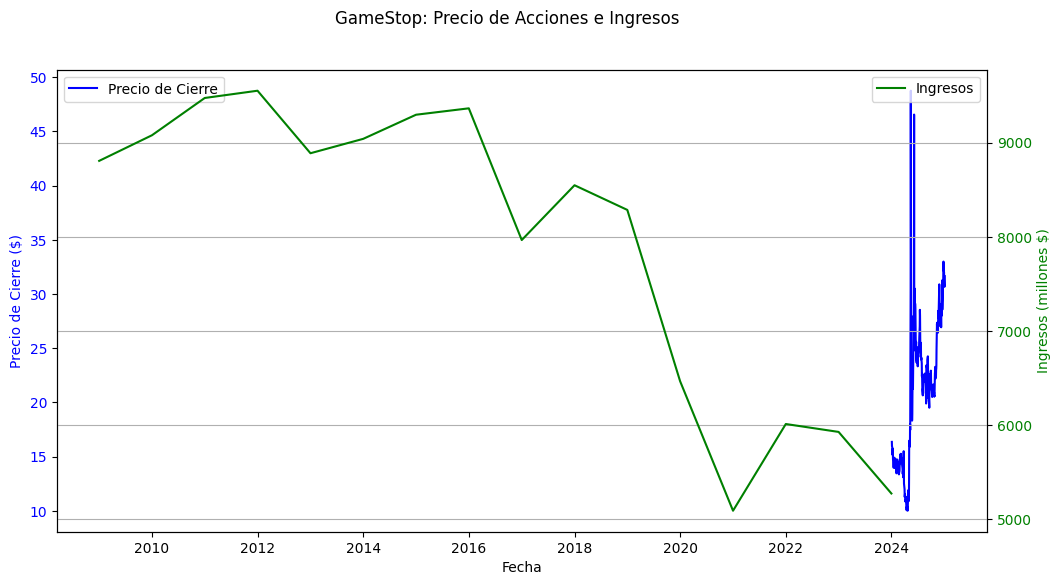

In [17]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

# Cargar datos de acciones de GameStop
gamestop = yf.Ticker("GME")
gme_data = gamestop.history(period="1y")

# Cargar datos de ingresos desde MacroTrends
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
headers = {'User-Agent': 'Mozilla/5.0'}
response = requests.get(url, headers=headers)
if response.status_code == 200:
    soup = BeautifulSoup(response.content, 'html.parser')
    table = soup.find('table', {'class': 'historical_data_table'})
    rows = table.find_all('tr')

    dates, revenues = [], []
    for row in rows[1:]:
        cols = row.find_all('td')
        if len(cols) == 2:
            date = cols[0].get_text(strip=True)
            revenue = cols[1].get_text(strip=True).replace('$', '').replace(',', '')
            dates.append(date)
            try:
                revenues.append(float(revenue))
            except ValueError:
                revenues.append(None)

    revenue_data = pd.DataFrame({'Date': pd.to_datetime(dates), 'Revenue (in millions USD)': revenues})
else:
    print(f"Error al acceder a los datos de ingresos: {response.status_code}")
    revenue_data = pd.DataFrame()

# Crear gráficos combinados
if not gme_data.empty and not revenue_data.empty:
    fig, ax1 = plt.subplots(figsize=(12, 6))

    # Gráfico de precios de acciones
    ax1.plot(gme_data.index, gme_data['Close'], color='blue', label='Precio de Cierre')
    ax1.set_xlabel('Fecha')
    ax1.set_ylabel('Precio de Cierre ($)', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')

    # Gráfico de ingresos
    ax2 = ax1.twinx()  # Crea un segundo eje Y
    ax2.plot(revenue_data['Date'], revenue_data['Revenue (in millions USD)'], color='green', label='Ingresos')
    ax2.set_ylabel('Ingresos (millones $)', color='green')
    ax2.tick_params(axis='y', labelcolor='green')

    # Títulos y leyendas
    fig.suptitle('GameStop: Precio de Acciones e Ingresos')
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')

    plt.grid()
    plt.show()
else:
    print("Error: Datos insuficientes para generar el tablero.")
